<a href="https://colab.research.google.com/github/AnkitGaur2811/Image_conversion_app/blob/main/Image_Conversion_App_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Image Conversion from Simple image***
> To 
1. Edge Image
2. Pencile sketch
3. Painting
4. Cartoon image



###Step 1:- Import All libraries 
Namely
- Numpy (For storing Image)
- Matplotlib (For Display image)
- OpenCV (for Converting the image)

In [ ]:
# installing all imp libs to the machine
!pip install opencv_contrib_python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


###Step 2:- Import and show the image
for this we will be using opencv and matplotlib


In [ ]:
def read_image(Image):
  '''
  This Function is made to take image input from the user
  Input: Path of the Image
  Output: Image in RGB format
  '''
  img = cv2.imread(Image)
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # As opencv read the image as BGR so we have to convert it to RGB
  plt.imshow(img)
  plt.show()
  return img


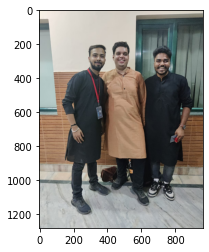

In [ ]:
filename ="/content/to.jpeg"
Image= read_image(filename)


### Step 3:- Converting the Image to respective types
Making diffrent Function for each work

####4. Cartoon Image

In [ ]:
# create Edge
def edge_mask(Image, line_size, Blur_value):
  grey_img=cv2.cvtColor(Image,cv2.COLOR_RGB2GRAY)
  grey_blur= cv2.medianBlur(grey_img, Blur_value)
  edge_image= cv2.adaptiveThreshold(grey_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, Blur_value)
  return edge_image
# line_size,Blur_value=7,7
# edges= edge_mask(Image,line_size,Blur_value)
# plt.imshow(edges, cmap="binary")
# plt.show()


In [ ]:
#reduce Colour Palet
def colour_quantization(Image, k):
  data=np.float32(Image).reshape(-1,3)
  critria= (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.01)
  ret, label, center= cv2.kmeans(data,k, None, critria, 10, cv2.KMEANS_RANDOM_CENTERS)
  centers= np.uint8(center)
  result=centers[label.flatten()]
  result=result.reshape(Image.shape)
  return result
# Paint= colour_quantization(Image,10)
# plt.imshow(Paint)
# plt.show()
# cv2.imwrite("final1.jpg",Paint)

In [ ]:
def cartoon(Paint,edges):
  Blurred_img= cv2.bilateralFilter(Paint, d=8 ,sigmaColor=200, sigmaSpace=200)
  Final=cv2.bitwise_and(Blurred_img,Blurred_img,mask=edges)
  # plt.imshow(Final)
  # plt.show()
  # Final= cv2.cvtColor(Final, cv2.COLOR_RGB2BGR)
  # cv2.imwrite("Final.jpg", Final)
  return Final
# cartoon()

In [ ]:
def Main_cartoon(Image,Line_size,Blur_value,Color_count):
  edge_mask_img= edge_mask(Image, Line_size, Blur_value)
  Paint_img=colour_quantization(Image, Color_count)
  cartoon_img= cartoon(Paint_img,edge_mask_img)
  # cartoon_img=cv2.cvtColor(cartoon_img, cv2.COLOR_RGB2BGR)
  return cartoon_img

x=Main_cartoon(Image,7,7,10)


####3. Painting

In [ ]:
def Painting(Image, Colour_count):
  Painting=colour_quantization(Image,Colour_count)
  # Painting=cv2.cvtColor(Painting, cv2.COLOR_RGB2BGR)
  return Painting

y=Painting(Image,10)

####2.Pencil Sketch

In [ ]:
def Pencil_sketch(Image):
  grey_img=cv2.cvtColor(Image, cv2.COLOR_BGR2GRAY)
  invert_img=cv2.bitwise_not(grey_img)
  blur_img=cv2.GaussianBlur(invert_img, (111,111),0)
  invblur_img=cv2.bitwise_not(blur_img)
  sketch_img=cv2.divide(grey_img,invblur_img, scale=256.0)
  return sketch_img

z=Pencil_sketch(Image)

####1.Edge Sketch

In [ ]:
def Edge_sketch(Image):
  edge_img = cv2.Canny(Image,100,200)
  edge_img = cv2.cvtColor(edge_img,cv2.COLOR_BGR2RGB)
  return edge_img

t=Edge_sketch(Image)

###Step 4:- Testing

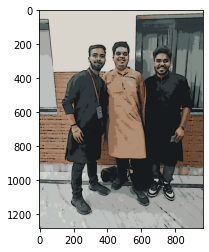

True

In [ ]:
plt.imshow(x)
plt.show()
cv2.imwrite("Final.jpg", x)

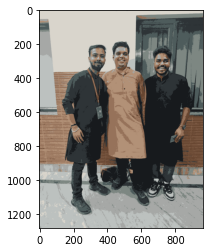

True

In [ ]:
plt.imshow(y)
plt.show()
cv2.imwrite("final1.jpg",y)

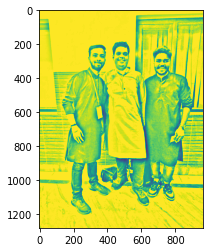

True

In [ ]:
plt.imshow(z)
plt.show()
cv2.imwrite("final2.jpg",z)

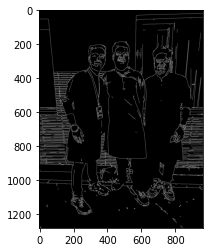

True

In [ ]:
plt.imshow(t)
plt.show()
cv2.imwrite("final3.jpg",t)

### Step 5:- Gradio app and driver code

#### Driver Code

In [ ]:
def Sketch_app(Image,Type,Color_count,Line_size,Blur_value):
  if Type == "Cartoon":
    Result = Main_cartoon(Image,Line_size,Blur_value,Color_count)
  elif Type == "Painting":
    Result = Painting(Image,Color_count)
  elif Type == "Pencil sketch":
    Result = Pencil_sketch(Image)
  else:
    Result = None
  return Result
  

#### Gradio app

##### Installing and Importing Gradio
As Gradio is a 3rd party library we have to install it in Our Run time before Executing

In [ ]:
!pip install gradio 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import gradio as gr

In [ ]:
Image_conversion = gr.Interface(
    fn = Sketch_app,
    inputs=[
            gr.Image( tool="select",label="Image to Convert", show_label=True),
            gr.Dropdown( choices = ["Pencil sketch","Painting","Cartoon"],label="Type to convert", show_label=True),
            gr.Slider( minimum=5, maximum=20, value =10, step= 1,label="Number of colour to be used in photo ( use only in case of painting and cartoon)", show_label=True),
            gr.Slider( minimum=5, maximum=10, value =7, step= 1,label="Blurr effect to be used in photo ( use only in case of cartoon)", show_label=True),
            gr.Slider( minimum=5, maximum=10, value =7, step= 1,label="Thickness of edges to be used in photo ( use only in case of cartoon)", show_label=True)],
    outputs= "image",
    tittle = " Image Conversion App",
    description = """This is an image conversion app we take a regular photo and convert it into Cartoon, Painting, Pencil sketch. it is purely python based used 
    Gradio(for interfaceing), OpenCV (For image conversion), Numpy(for storing the image), Matplotlib (for displaying the image) """,
    theme = "dark"
)


/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:44: UserWarning: You have unused kwarg parameters in Interface, please remove them: {'tittle': ' Image Conversion App'}
  f"You have unused kwarg parameters in {cls}, please remove them: {kwargs}"
/usr/local/lib/python3.7/dist-packages/gradio/interface.py:286: UserWarning: Currently, only the 'default' theme is supported.
  warnings.warn("Currently, only the 'default' theme is supported.")


In [ ]:
Image_conversion.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://26377.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<gradio.routes.App at 0x7f65b2842e50>,
 'http://127.0.0.1:7860/',
 'https://26377.gradio.app')